In [ ]:
import pandas as pd
data=pd.read_csv("/content/drug200.csv")
data

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX


In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
upd=['Sex','BP','Cholesterol']
data[upd]=data[upd].apply(le.fit_transform)
data

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0,0,0,25.355,DrugY
1,47,1,1,0,13.093,drugC
2,47,1,1,0,10.114,drugC
3,28,0,2,0,7.798,drugX
4,61,0,1,0,18.043,DrugY
...,...,...,...,...,...,...
195,56,0,1,0,11.567,drugC
196,16,1,1,0,12.006,drugC
197,52,1,2,0,9.894,drugX
198,23,1,2,1,14.020,drugX


In [ ]:
x=data[['Age','Sex','BP','Cholesterol']]
y=data['Drug']

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components=2).fit_transform(x,y)

In [ ]:
import pandas as pd
Df = pd.DataFrame(data=lda , columns = ['LDA1', 'LDA2'])

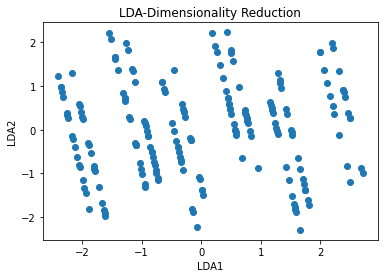

In [ ]:
import matplotlib.pyplot as plt
x=Df['LDA1']
y=Df['LDA2']
plt.scatter(x,y)
plt.xlabel('LDA1')
plt.ylabel('LDA2')
plt.title('LDA-Dimensionality Reduction')
plt.show() 

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2,max_iter=3000, random_state=20).fit(Df)
pl=kmeans.cluster_centers_
pl

array([[-1.15375378, -0.13546447],
       [ 1.35440661,  0.15902351]])

In [ ]:
labels=kmeans.labels_
labels

array([0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1], dtype=int32)

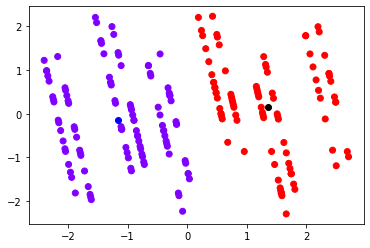

In [ ]:
plt.scatter(x,y,c=labels,cmap='rainbow')
plt.scatter(pl[0][0],pl[0][1],color='blue')
plt.scatter(pl[1][0],pl[1][1],color='black')
plt.show() 